In [ ]:
import numpy as np
import matplotlib.pylab as plt

In [ ]:
from PIL import Image, ImageFilter
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import rescale
from scipy.ndimage.filters import generic_filter

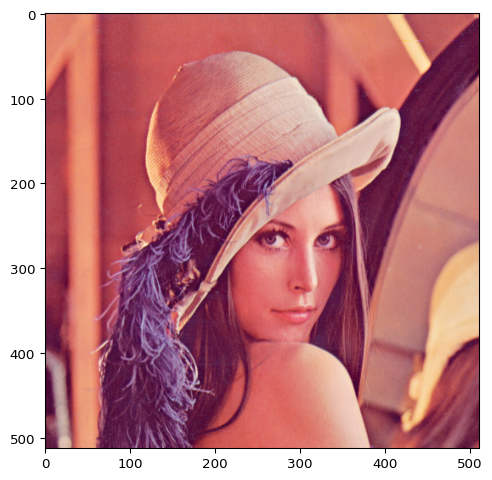

In [ ]:
im = imread('./lena.png')

plt.figure(num=None, figsize=(6, 6), dpi=96)
plt.imshow(im,cmap='gray')


256


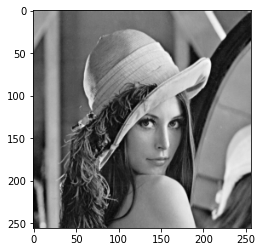

In [ ]:
r_scaled = rescale(im[:,:,0], 0.5)
g_scaled = rescale(im[:,:,1], 0.5)
b_scaled = rescale(im[:,:,2], 0.5)
im_scaled = np.stack([r_scaled, g_scaled, b_scaled], axis=2)
im_gray = rescale(rgb2gray(im), 0.5) 
plt.imshow(im_gray,cmap='gray')
print(im_gray.shape[1])
#print(im_gray)

In [ ]:
def convolve2D(image, kernel, padding=0, strides=1):

    kernel = np.flipud(np.fliplr(kernel))

    xKShape = kernel.shape[0]
    yKShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    xOutput = int(((xImgShape - xKShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    imagePadded = image


    for y in range(image.shape[1]):
        for x in range(image.shape[0]):
            if x > image.shape[0] - xKShape:
                break
            try:
               if x % strides == 0:
                 output[x, y] = (kernel * imagePadded[x: x + xKShape, y: y + yKShape]).sum()
            except:
               break

    return output

In [ ]:
def rgb_convolve2D(image, kernel):
    red = convolve2D(image[:,:,0], kernel)
    green = convolve2D(image[:,:,1], kernel)
    blue = convolve2D(image[:,:,2], kernel)
    return np.stack([red, green, blue], axis=2)

In [ ]:
# identity = np.array([[0, 0, 0],
#            [0, 1, 0],
#            [0, 0, 0]])

# conv_im1 = rgb_convolve2D(im_scaled, identity)
# fig, ax = plt.subplots(1,2, figsize=(12,5))
# # ax[0].imshow(identity, cmap='gray')
# # ax[1].imshow(abs(conv_im1), cmap='gray')

In [ ]:
# Laplace mask
kernel1 = np.array([[0, -1, 0],
           [-1, 4, -1],
           [0, -1, 0]])


# Sobel Filter y
kernel2 = np.array([[-1, -2, -1],
           [0, 0, 0],
           [1, 2, 1]])


# Sobel Filter x
kernel3 = np.array([[-1, 0, 1],
           [-2, 0, 2],
           [-1, 0, 1]])

In [ ]:
def so(img1,img2):
  myimg=np.zeros(img1.shape)
  for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
      if img1[i][j]+img2[i][j]>1:
        myimg[i][j]=1
      elif img1[i][j]+img2[i][j]<0:
        myimg[i][j]=0
      else:
        myimg[i][j]=img1[i][j]+img2[i][j]
  return myimg  


254
254


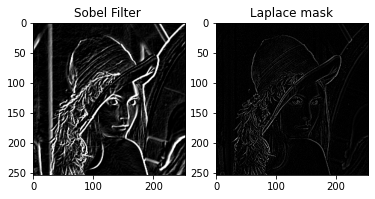

In [ ]:
kernels = [kernel1, kernel2, kernel3]
kernel_name = ['Sobel Filter ','Laplace mask']

gy = convolve2D(im_gray,kernel2).clip(0,1)
gx = convolve2D(im_gray,kernel3).clip(0,1)

im1st = so(gx,gy)
im2nd = convolve2D(im_gray,kernel1).clip(0,1)
conv_im =[im1st,im2nd]
print(im1st.shape[1])
print(im2nd.shape[1])
figure, axis = plt.subplots(1,2, figsize=(6,6))
i = 0
for kernel, name, ax in zip(kernels, kernel_name, axis.flatten()):
    ax.imshow(conv_im[i], cmap='gray')
    i+=1
    ax.set_title(name)


In [ ]:
def meanfil(img1):
  myimg=np.zeros(img1.shape)
  for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
      img1[i][j]=img1[i][j]/9
      # if(img1[i][j]>0.05):
      #   print(img1[i][j])
      if img1[i][j]>0.043:
        myimg[i][j]=1
      else:
        myimg[i][j]=0

  return myimg  


254


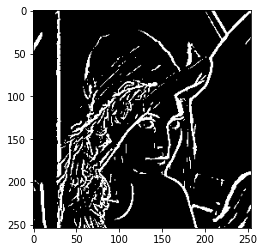

In [ ]:
im3rd = meanfil(im1st)
print(im3rd.shape[1])
plt.imshow(im3rd,cmap='gray')

In [ ]:
def two_multi(img1,img2):
  myimg=np.zeros(img1.shape)
  for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
      myimg[i][j]=img1[i][j]*img2[i][j]
      if myimg[i][j]>1:
        myimg[i][j]=1
      elif myimg[i][j]<0:
        myimg[i][j]=0
      else:myimg[i][j]=myimg[i][j]
      #print(myimg[i][j])
  return myimg  

In [ ]:
def unsharp(img1,img2):
  myimg=np.zeros(img1.shape)
  print(img1.shape[0])
  print(img1.shape[1])
  print(img1.shape[2])
  for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
      for k in range(img1.shape[2]):
        try:
          myimg[i][j][k]=img1[i][j][k]+img2[i][j]
        
          if myimg[i][j][k]>1:
            myimg[i][j][k]=1
          elif myimg[i][j][k]<0:
            myimg[i][j][k]=0
          else:
            myimg[i][j][k]=myimg[i][j][k]
        except:
          myimg[i][j][k]=img1[i][j][k]
  return myimg  

In [ ]:
def unsharpg(img1,img2):
  myimg=np.zeros(img1.shape)
  print(img1.shape[0])
  print(img1.shape[1])

  for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):

       try:
        myimg[i][j]=img1[i][j]+img2[i][j]
      
        if myimg[i][j]>1:
          myimg[i][j]=1
        elif myimg[i][j]<0:
           myimg[i][j]=0
        else:
          myimg[i][j]=myimg[i][j]
       except:
          myimg[i][j]=img1[i][j]
  return myimg  

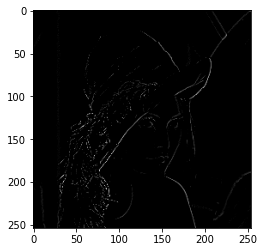

In [ ]:
um = two_multi(im2nd,im3rd)
#print(um)
#print(um.shape[1])
#norum=norm(um)
plt.imshow(um,cmap='gray')


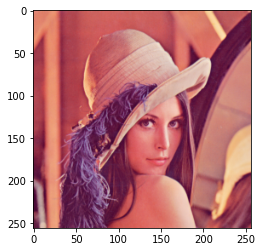

In [ ]:
plt.imshow(im_scaled)

In [ ]:
print(im_gray)

[[0.60801531 0.60600309 0.59746193 ... 0.6353459  0.64089688 0.53410306]
 [0.60801626 0.60600066 0.59746204 ... 0.63533407 0.64087554 0.53407581]
 [0.61082065 0.59764545 0.59808847 ... 0.58400692 0.55055642 0.42469821]
 ...
 [0.17128469 0.17377553 0.17954745 ... 0.28683446 0.32654878 0.32394106]
 [0.14852548 0.16472368 0.16916749 ... 0.32994474 0.3581374  0.34841714]
 [0.14788142 0.1778059  0.16854412 ... 0.35892828 0.36256502 0.37646931]]


In [ ]:
def norm(img1):
  myimg=np.zeros(img1.shape)
  for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
      myimg[i][j]=img1[i][j]/255
      #print(myimg[i][j])
  return myimg

256
256


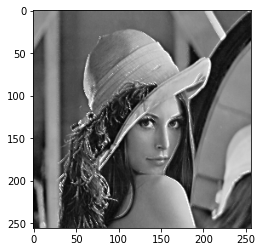

In [ ]:
myResult = unsharpg(im_gray,um)
plt.imshow(myResult,cmap='gray')

256
256
3


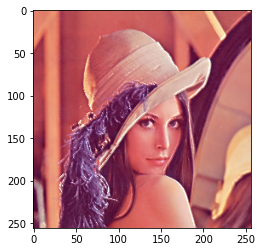

In [ ]:
myResult = unsharp(im_scaled,um)
#print(im_scaled)
plt.imshow(myResult,cmap='gray')
plt.savefig('sharp_lena.png')